In [ ]:
from train import train_dqn
from utils import rollout_dqn
from vis import plot_training_rewards, plot_rollout_histogram, plot_max_q_values
import gymnasium as gym
import torch

device = torch.device("cuda:1")
print(f"Currently using device: {device}")

Currently using device: cuda:1


### Part 1: Train Deep Q Network on CartPole environment

Training

In [2]:
env = gym.make("CartPole-v1")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
obs_dim = env.observation_space.shape[0]
act_dim = env.action_space.n

trained_q_network, training_rewards, training_max_q_values = train_dqn(
    env=env,
    device=device,
    obs_dim=obs_dim,
    act_dim=act_dim,
    preprocess_obs=None,
    gamma=0.95,
    lr=1e-3,
    epsilon_start=1.0,
    epsilon_end=0.05,
    epsilon_decay=5000,
    batch_size=64,
    buffer_size=5000,
    min_buffer=1000,
    target_update_freq=500,
    training_episodes=1000,
    hidden_dim=64,
    use_epsilon_scheduler=False,   
    use_huber_loss=False
)

Episode    0 | Reward:   10.0 | ε=0.05
Episode   50 | Reward:    9.0 | ε=0.05
Episode  100 | Reward:    9.0 | ε=0.05
Episode  150 | Reward:   16.0 | ε=0.05
Episode  200 | Reward:    9.0 | ε=0.05
Episode  250 | Reward:   13.0 | ε=0.05
Episode  300 | Reward:  193.0 | ε=0.05
Episode  350 | Reward:  189.0 | ε=0.05
Episode  400 | Reward:  146.0 | ε=0.05
Episode  450 | Reward:  215.0 | ε=0.05
Episode  500 | Reward:  375.0 | ε=0.05
Episode  550 | Reward:  500.0 | ε=0.05
Episode  600 | Reward:   14.0 | ε=0.05
Episode  650 | Reward:  244.0 | ε=0.05
Episode  700 | Reward:  215.0 | ε=0.05
Episode  750 | Reward:  121.0 | ε=0.05
Episode  800 | Reward:  201.0 | ε=0.05
Episode  850 | Reward:   21.0 | ε=0.05
Episode  900 | Reward:  184.0 | ε=0.05
Episode  950 | Reward:  221.0 | ε=0.05


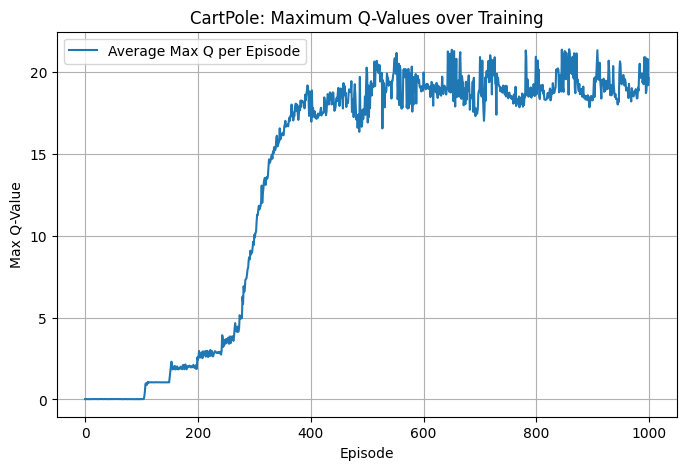

In [3]:
plot_max_q_values(game_name="CartPole", max_q_values=training_max_q_values)

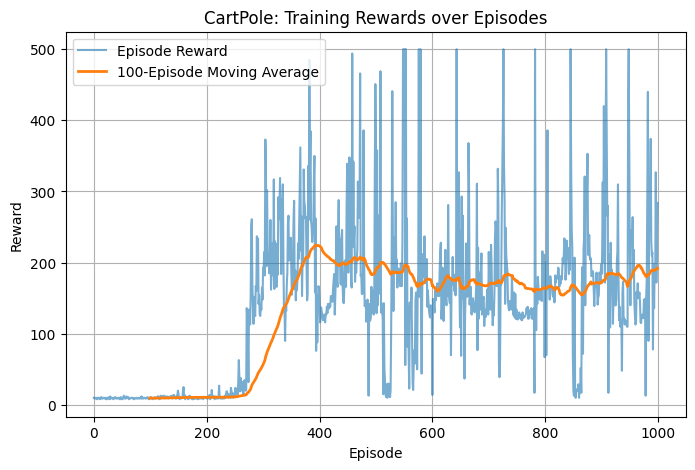

In [4]:
plot_training_rewards(game_name="CartPole", rewards=training_rewards)

In [5]:
rollout_rewards = rollout_dqn(env, q_network=trained_q_network, device=device, episodes=500)

Episode    0 | Return: 403.0
Episode   50 | Return: 500.0
Episode  100 | Return: 326.0
Episode  150 | Return: 401.0
Episode  200 | Return: 500.0
Episode  250 | Return: 415.0
Episode  300 | Return: 371.0
Episode  350 | Return: 414.0
Episode  400 | Return: 500.0
Episode  450 | Return: 186.0


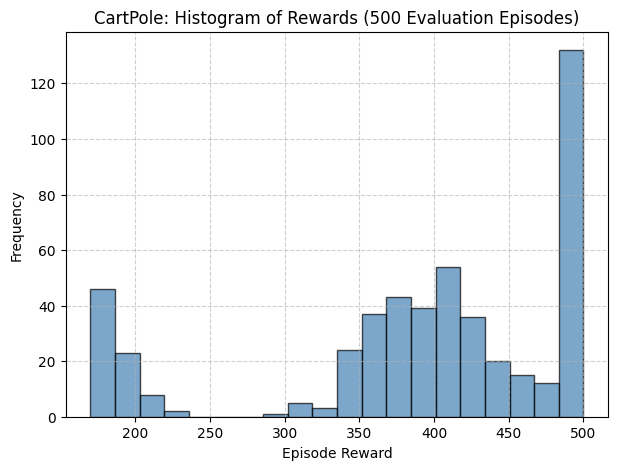

CartPole: Mean reward over 500 episodes: 391.02
CartPole: Std. dev. of reward: 102.37


In [6]:
plot_rollout_histogram(game_name="CartPole", rewards=rollout_rewards)